In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [7]:
#dataset from the https://github.com/numenta/NAB/blob/master/data/realKnownCause/ec2_request_latency_system_failure.csv
req = pd.read_csv('request.csv')
#convert str dtype to datetime
req['timestamp'] = pd.to_datetime(req['timestamp'])

#convert datetime dtype to timestamp
len = req.shape[0]
time_stamp = np.zeros(len)
for i in range(len):
    time_stamp[i] = datetime.timestamp(req['timestamp'][i])
    
req_stamp = pd.Series(req.value.values, index = time_stamp)    

Text(0.5, 1.0, 'EC2 Request Latency System Failure')

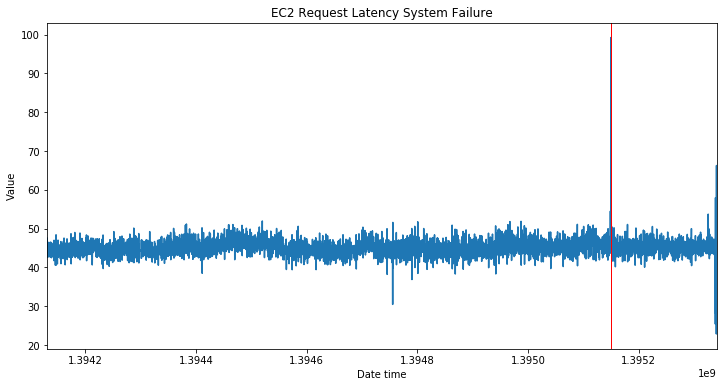

In [9]:
#draw time series plot
req_stamp.plot(x='timestamp', y='value', figsize=(12,6))
# plt.axvline(x=req_stamp.idxmax(), linewidth = 1, color = 'r')
plt.xlabel('Date time')
plt.ylabel('Value')
plt.title('EC2 Request Latency System Failure')

In [11]:
#for more information about library luminol, visit https://github.com/linkedin/luminol
from luminol.anomaly_detector import AnomalyDetector
from luminol.modules.time_series import TimeSeries

#you can modulate bound using 'score_threshold' parameter
detector = AnomalyDetector(req_stamp.to_dict(), score_threshold=None)
anomalies = detector.get_anomalies()
score = detector.get_all_scores()

#process for making Series that contains anomal datapoints
anomal_pt = []
anomal_vl = []
for i in anomalies:
    anomal_pt.append(i.exact_timestamp)
    anomal_vl.append(i.anomaly_score)
anomal = pd.Series(anomal_vl, index = anomal_pt).sort_values(ascending = False)


Text(0.5, 1.0, 'EC2 Request Latency System Failure')

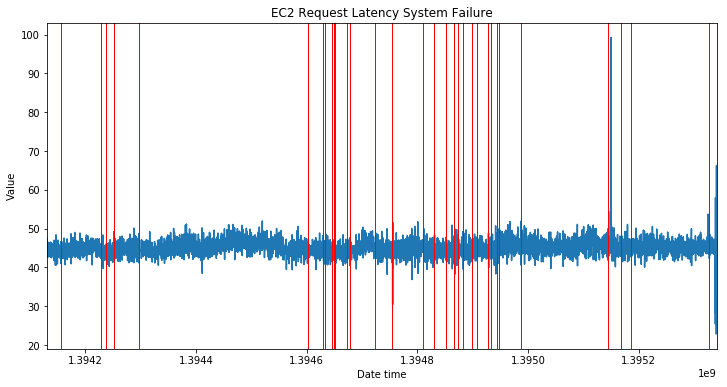

In [12]:
#draw plot with anomaly dectection inference
req_stamp.plot(x='timestamp', y='value', figsize=(12,6))
for i in anomal.index:
    plt.axvline(x=i, linewidth = 1, color = 'r')
plt.xlabel('Date time')
plt.ylabel('Value')
plt.title('EC2 Request Latency System Failure')